In [2]:
import pandas as pd
import dataset
from sklearn.model_selection import train_test_split

In [3]:
csv =  '/home/pavel/olina/research/neural_network_fl/benighn_0.csv'

In [4]:
# определение важности параметров
from sklearn.preprocessing import RobustScaler
import sys
sys.path.append("/home/pavel/olina/research/venv/lib/python3.10/site-packages")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# с помощью RandomForestRegressor найдем самые значимые параметры
def feature_importance(df_8):
    y = df_8['label']
    X = df_8.drop(columns = ['label'], axis = 1)
    name_features = list(X.columns)
    scaler = RobustScaler()
    X = scaler.fit_transform(X)
    
    model = RandomForestRegressor(n_estimators=100, max_features=4).fit(X,y)
    feats = {} # параметры 
    for feature, importance in zip(name_features, model.feature_importances_[:10]):
        feats[feature] = importance
    importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
    importances = importances.sort_values(by='Gini-Importance', ascending=False)
    importances = importances.reset_index()
    importances = importances.rename(columns={'index': 'Features'})
    
    sns.set(font_scale = 5)
    sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
    fig, ax = plt.subplots()
    fig.set_size_inches(30,15)
    sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='orange')
    plt.xlabel('Importance', fontsize=25, weight = 'bold')
    plt.ylabel('Features', fontsize=25, weight = 'bold')
    plt.title('Feature Importance', fontsize=25, weight = 'bold')
    display(plt.show())
    display(importances)

In [8]:
df_8=dataset.load_dataset(csv, classification_type='group')

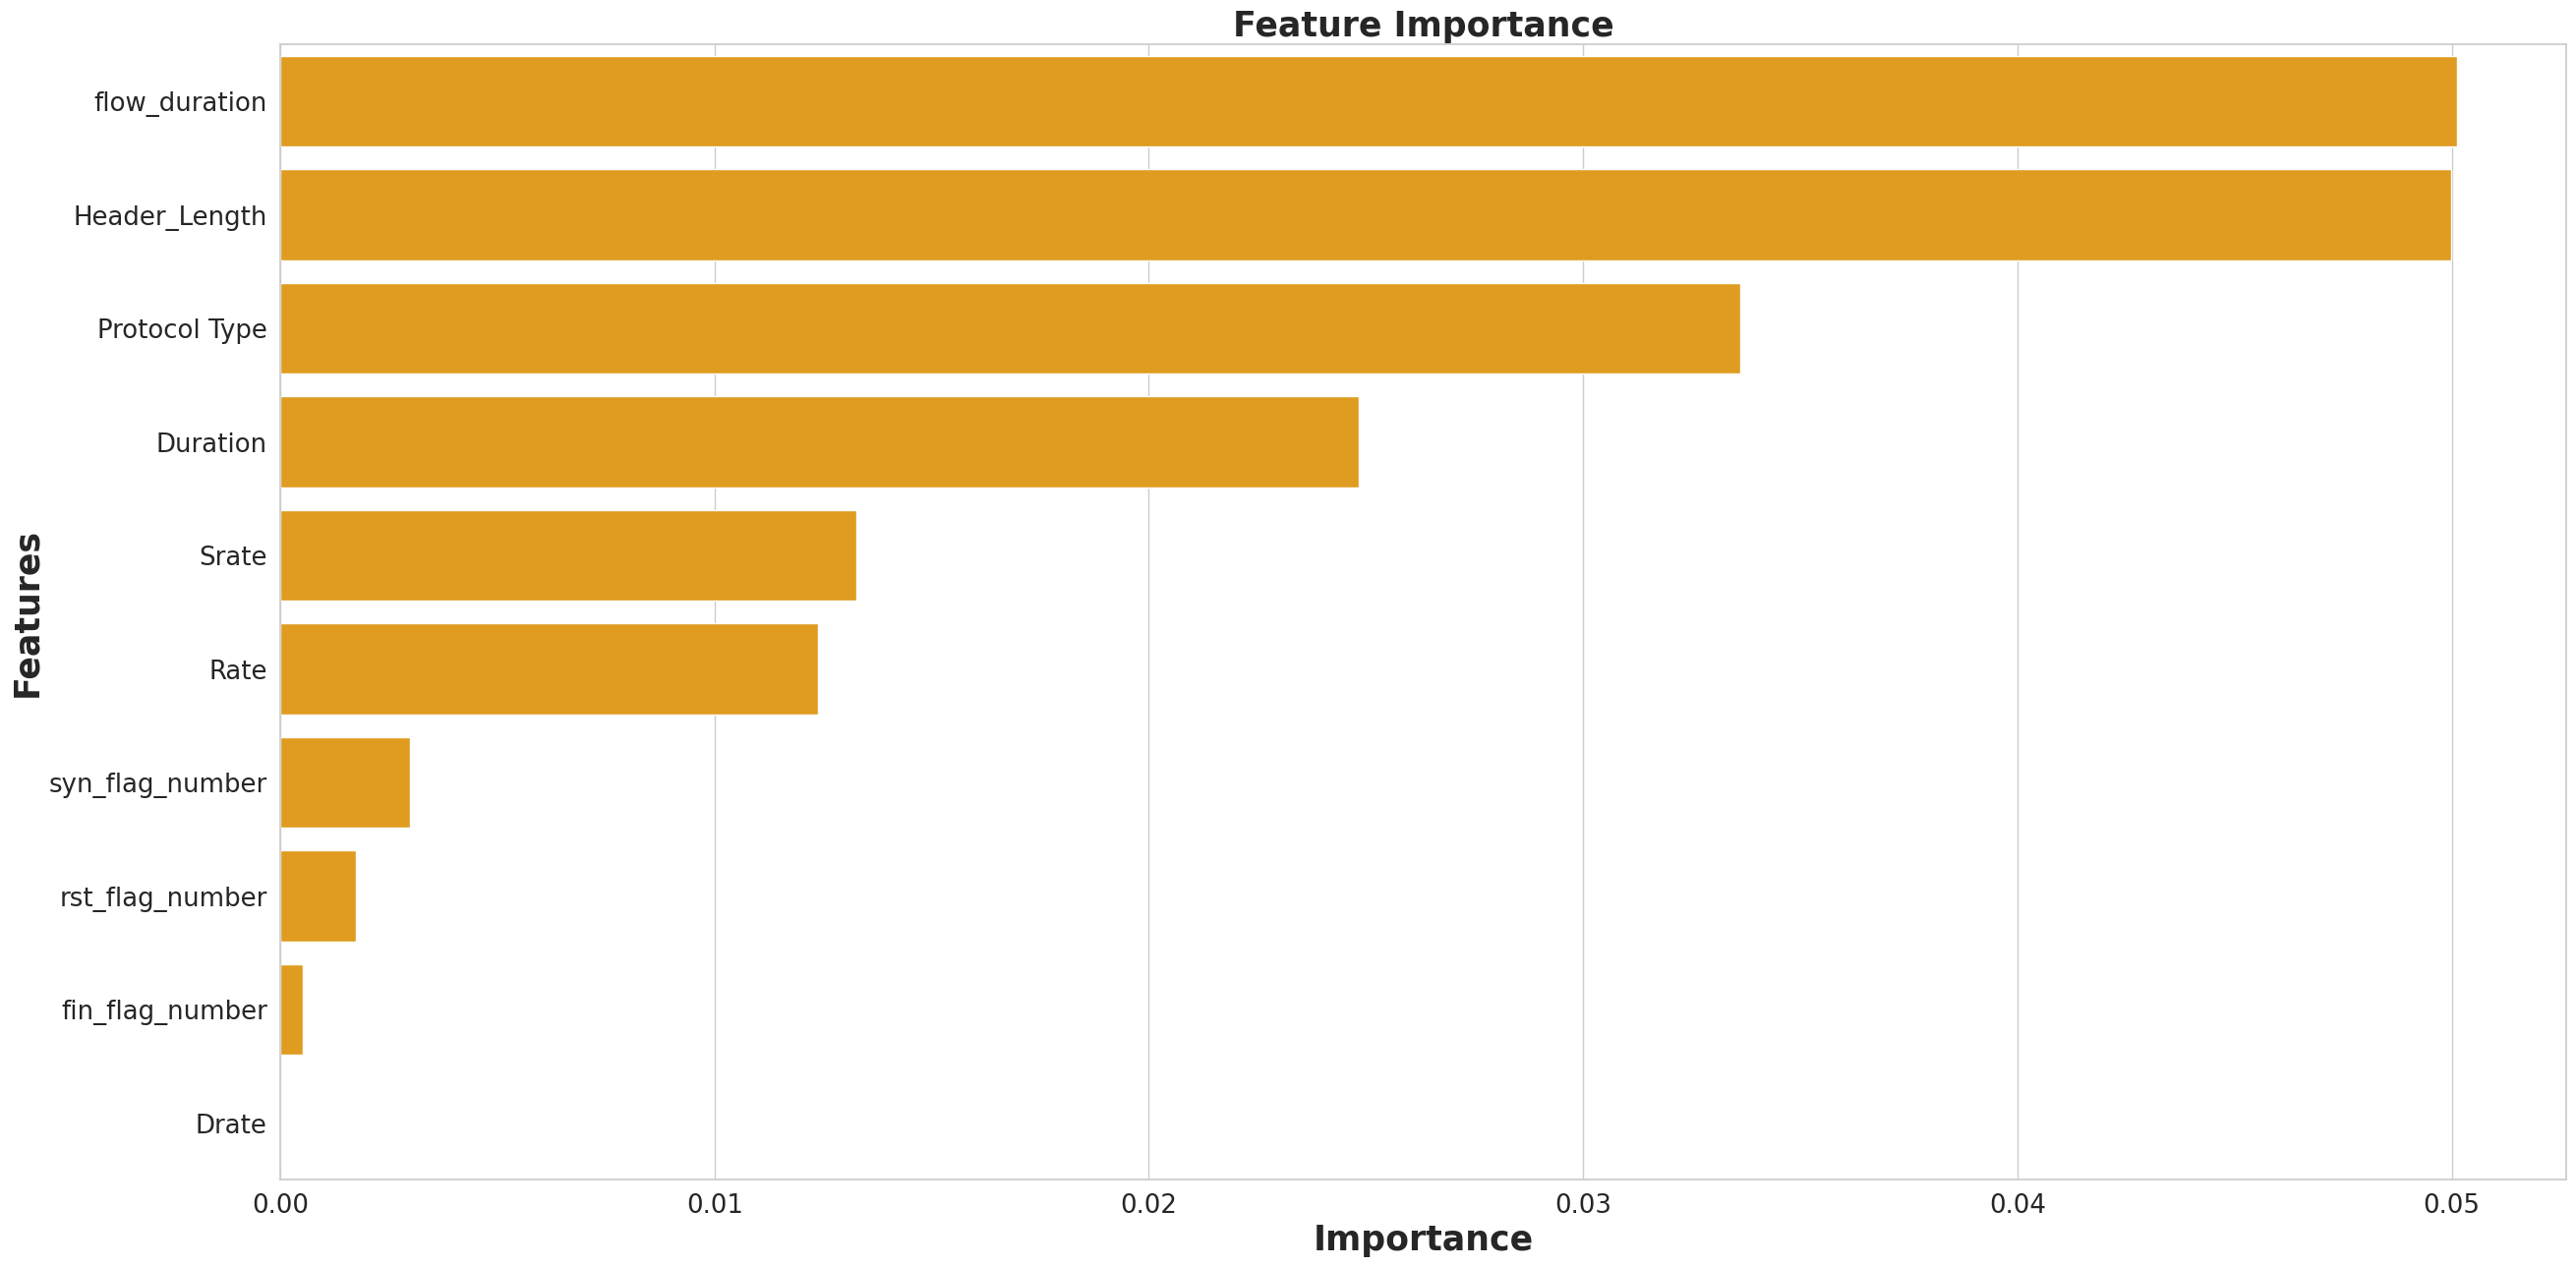

None

,Features,Gini-Importance
0,flow_duration,5.012807e-02
1,Header_Length,4.998687e-02
2,Protocol Type,3.362583e-02
3,Duration,2.483072e-02
4,Srate,1.327152e-02
5,Rate,1.237248e-02
6,syn_flag_number,2.990769e-03
7,rst_flag_number,1.737105e-03
8,fin_flag_number,5.248970e-04
9,Drate,3.183567e-07


In [13]:
feature_importance(df_8)

In [14]:
attack_features = ['flow_duration', 'Protocol Type', 'Header_Length', 'Srate', 'Rate', 'Duration', 'syn_flag_number', 'fin_flag_number', 'rst_flag_number', 'Drate']

In [15]:
features = df_8.columns

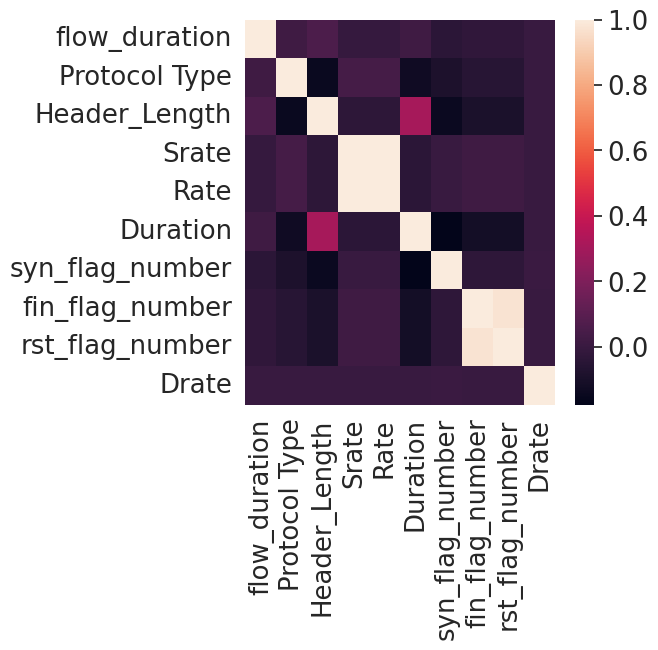

In [16]:
import seaborn as sns
corr_matrix = df_8[attack_features].corr()
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(corr_matrix);
plt.savefig('corr_heatmap.png', dpi=600)

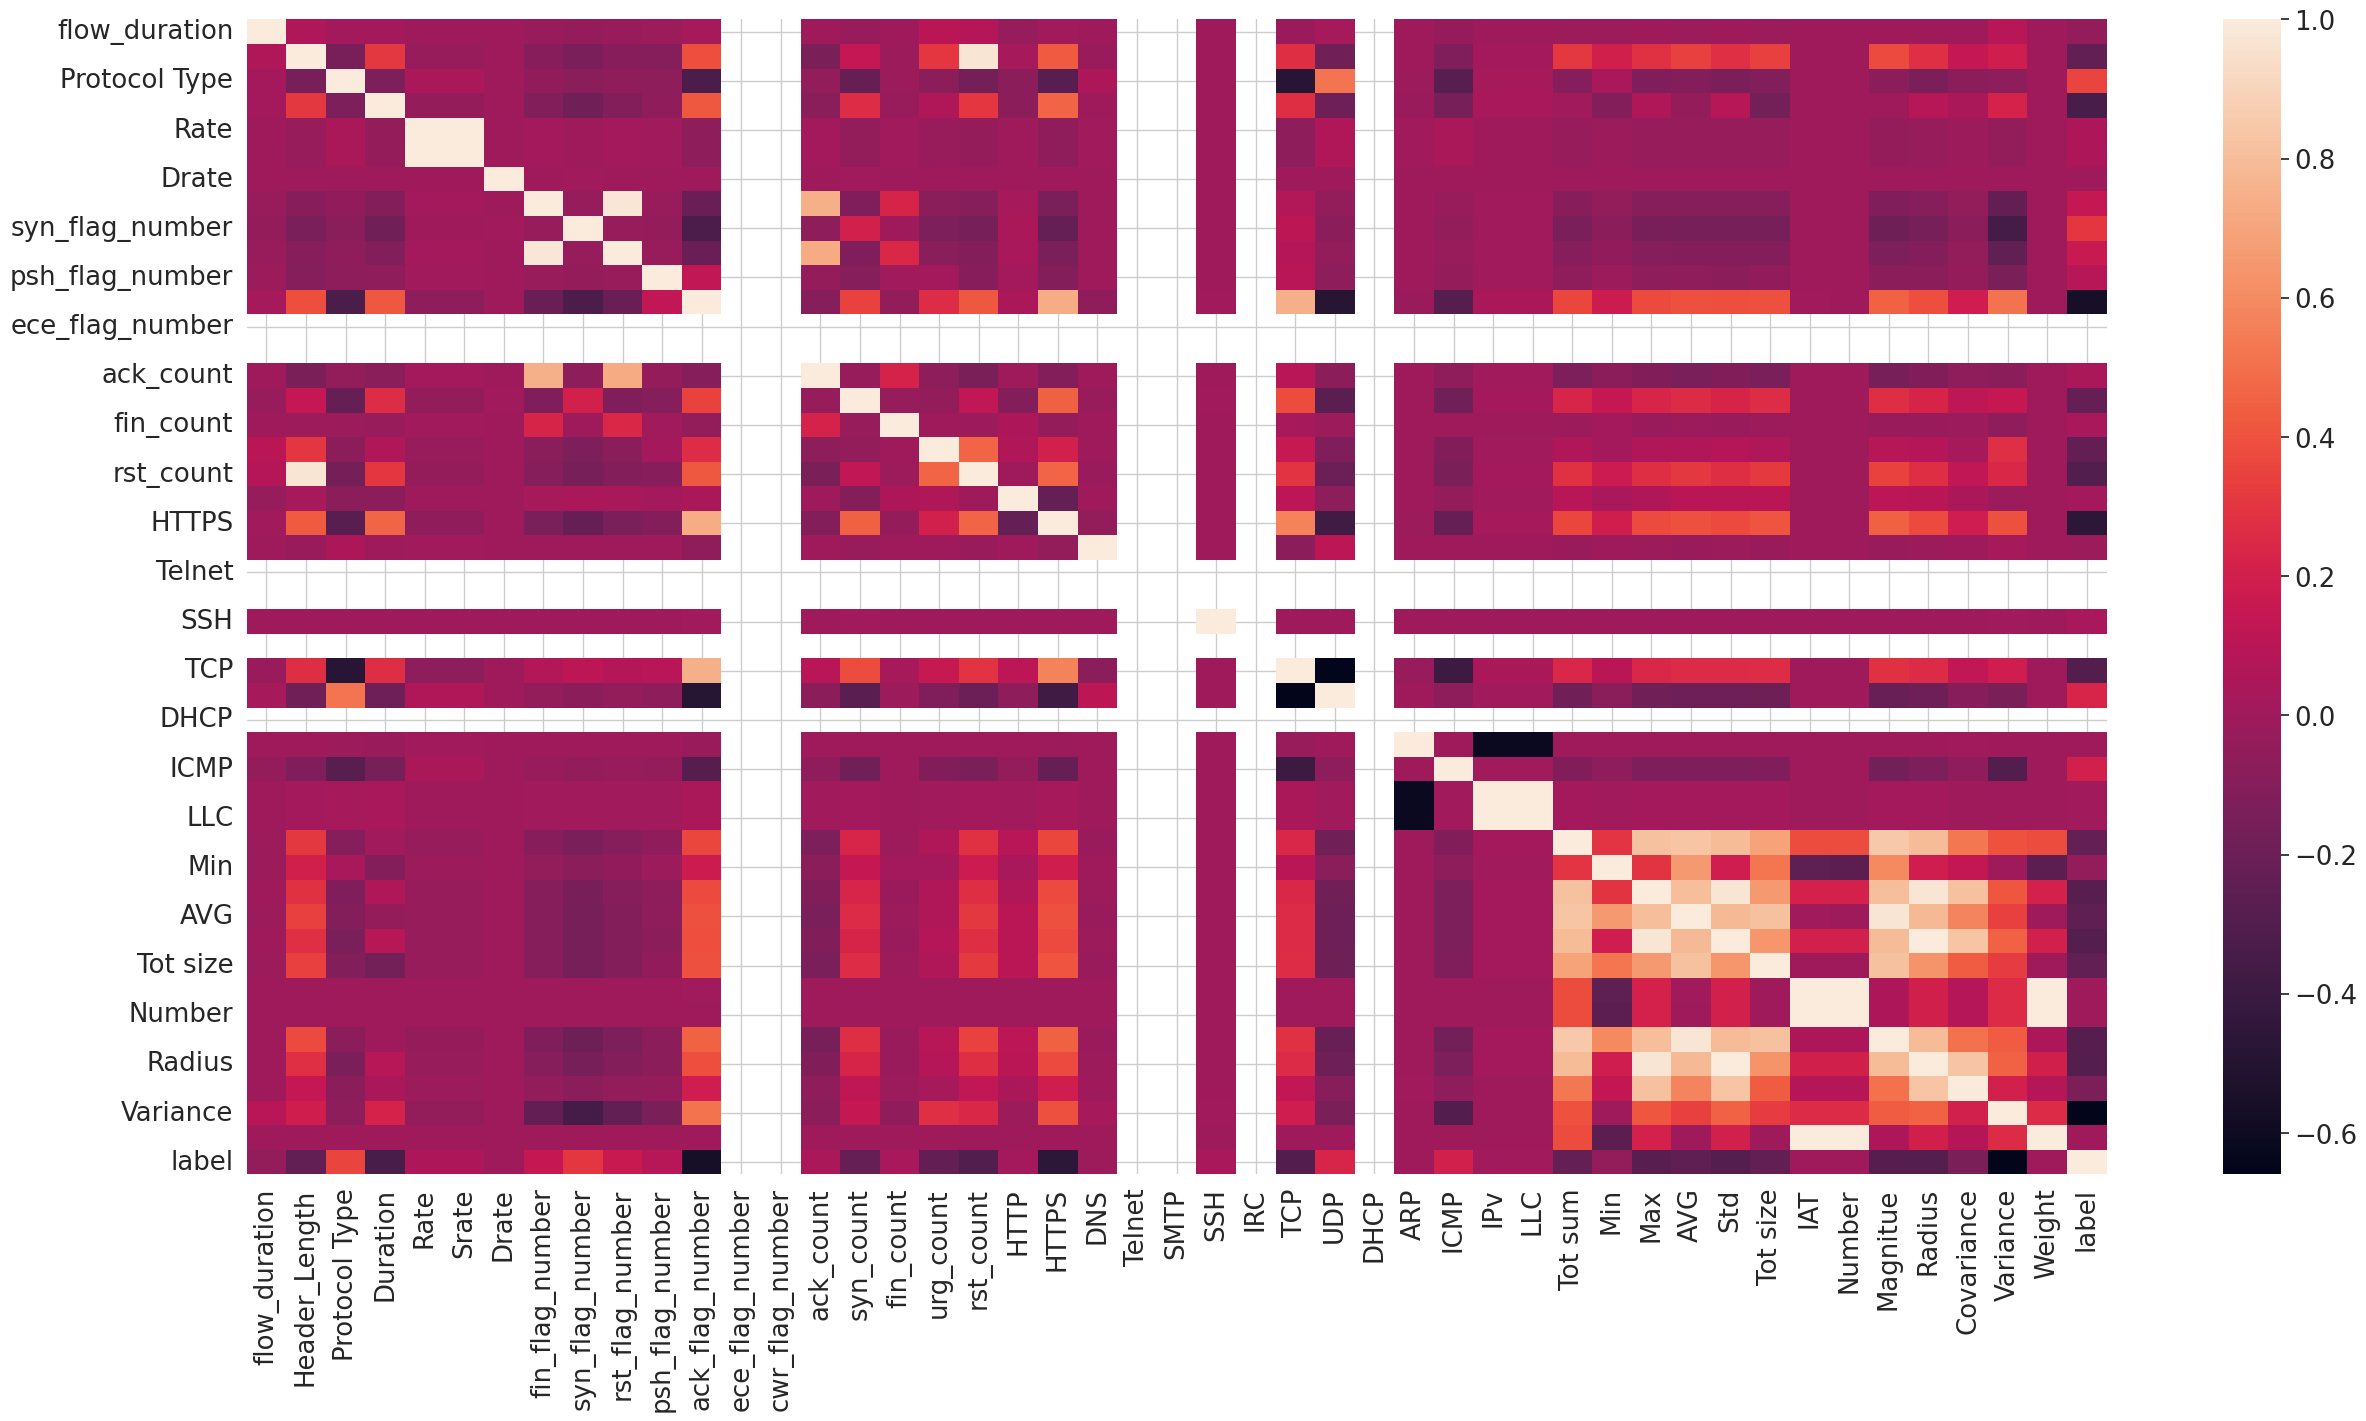

In [19]:
import seaborn as sns
corr_matrix = df_8.corr()
plt.rcParams['figure.figsize'] = (30, 15)
sns.heatmap(corr_matrix);
plt.savefig('corr_heatmap.png', dpi=500)

Распределение flow_duration - временной интервал, в течение которого продолжается передача данных между устройствами. <br> 
Аномально длинные или короткие показатели могут указывать на атаки.

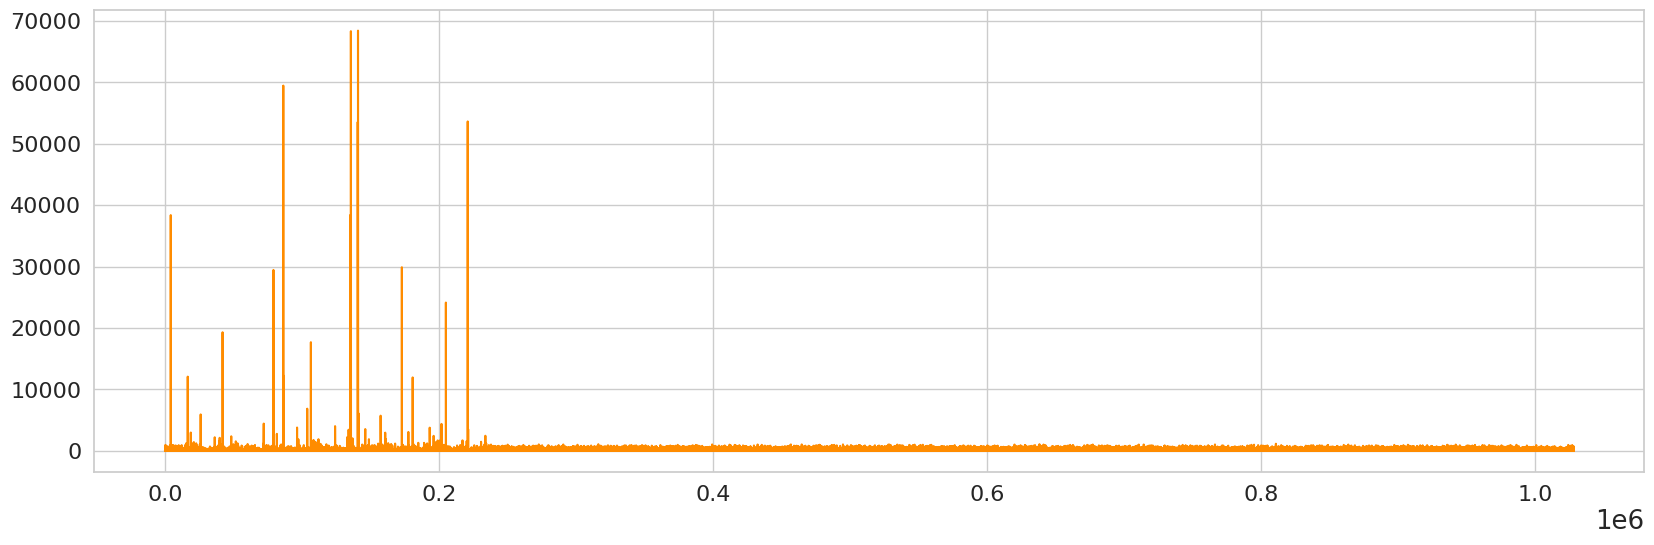

In [22]:
plt.figure(figsize=(20,6))
flow_duration = df_8['flow_duration']
time = list(range(len(flow_duration)))
plt.plot(time, flow_duration, linestyle='-',color='darkorange')
plt.grid(True)
plt.xticks(time[::200_000], fontsize=16);
plt.yticks(fontsize=16);


Header length

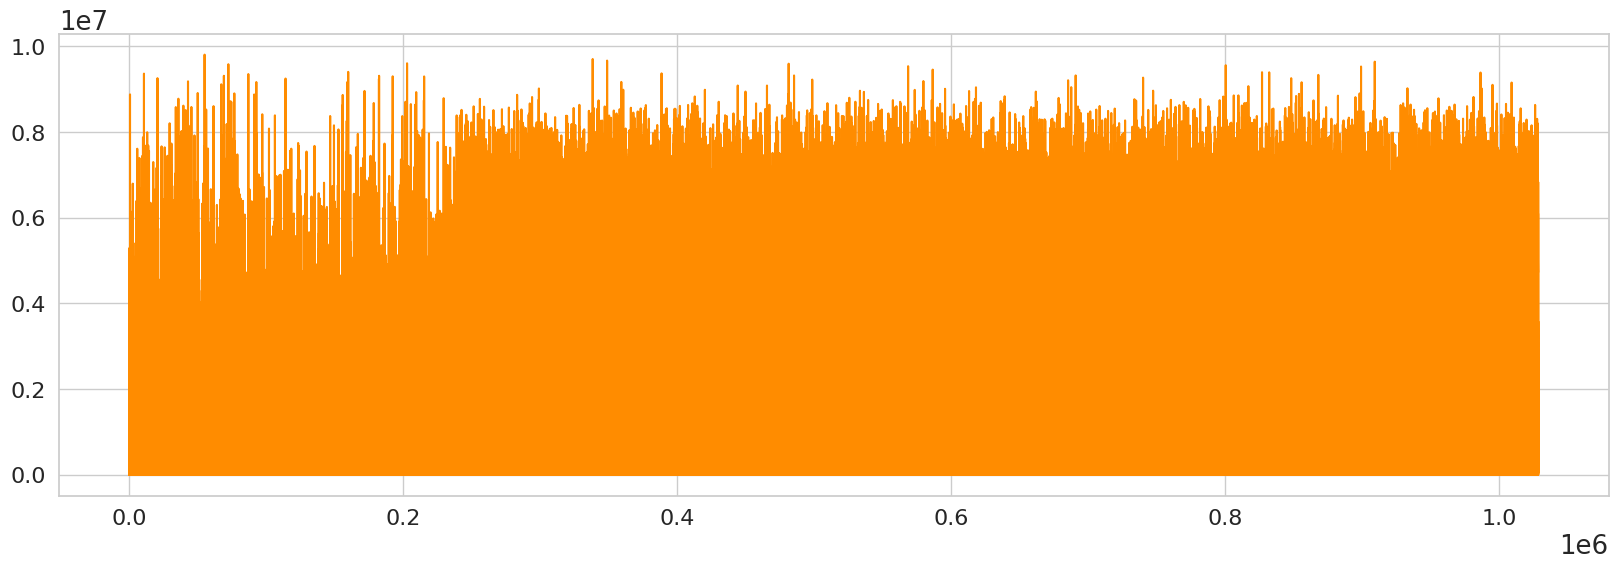

In [23]:
plt.figure(figsize=(20,6))
Header_Length = df_8['Header_Length']
time = list(range(len(Header_Length)))
plt.plot(time, Header_Length, linestyle='-',color='darkorange')
plt.grid(True)
plt.xticks(time[::200_000], fontsize=16);
plt.yticks(fontsize=16);

Rate - количетсво передаваемых данных в единицу времени. Слишком высокая или слишком низкая скорость может мигнлизировать об атаке

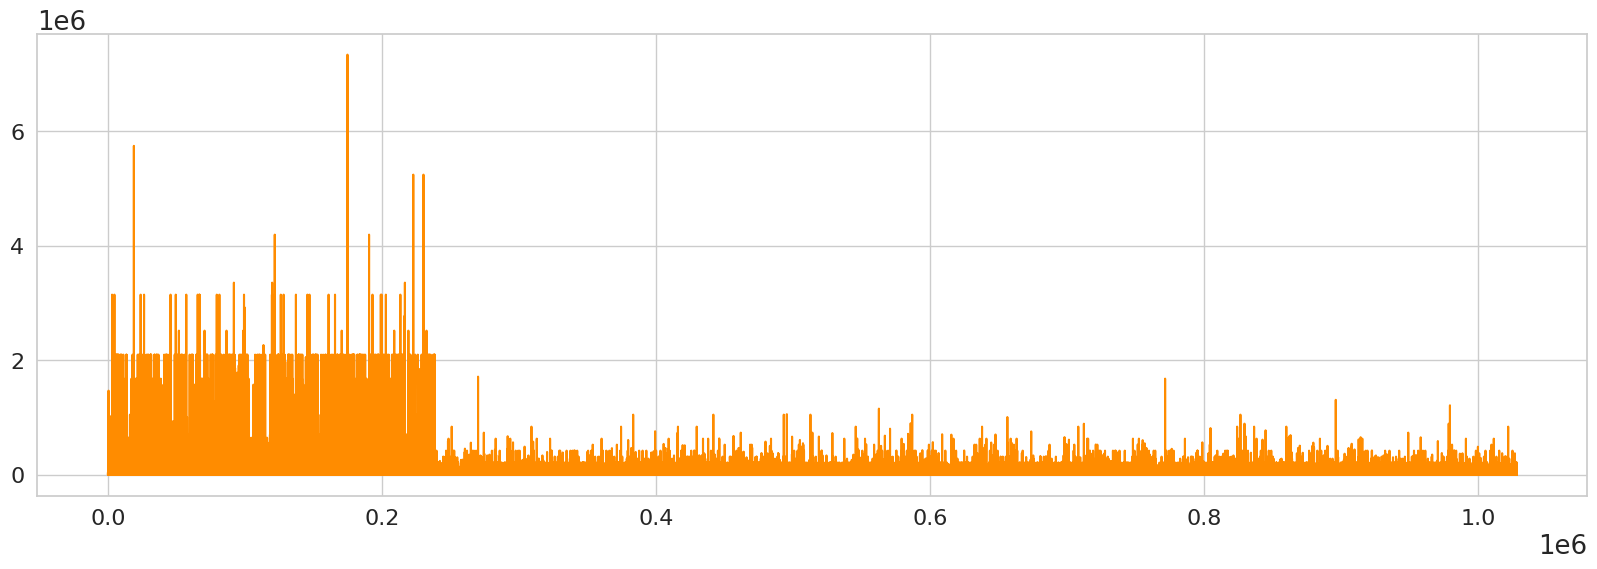

In [24]:
plt.figure(figsize=(20,6))
Rate = df_8['Rate']
time = list(range(len(Rate)))
plt.plot(time, Rate, linestyle='-',color='darkorange')
plt.grid(True)
plt.xticks(time[::200_000], fontsize=16);
plt.yticks(fontsize=16);

Srate

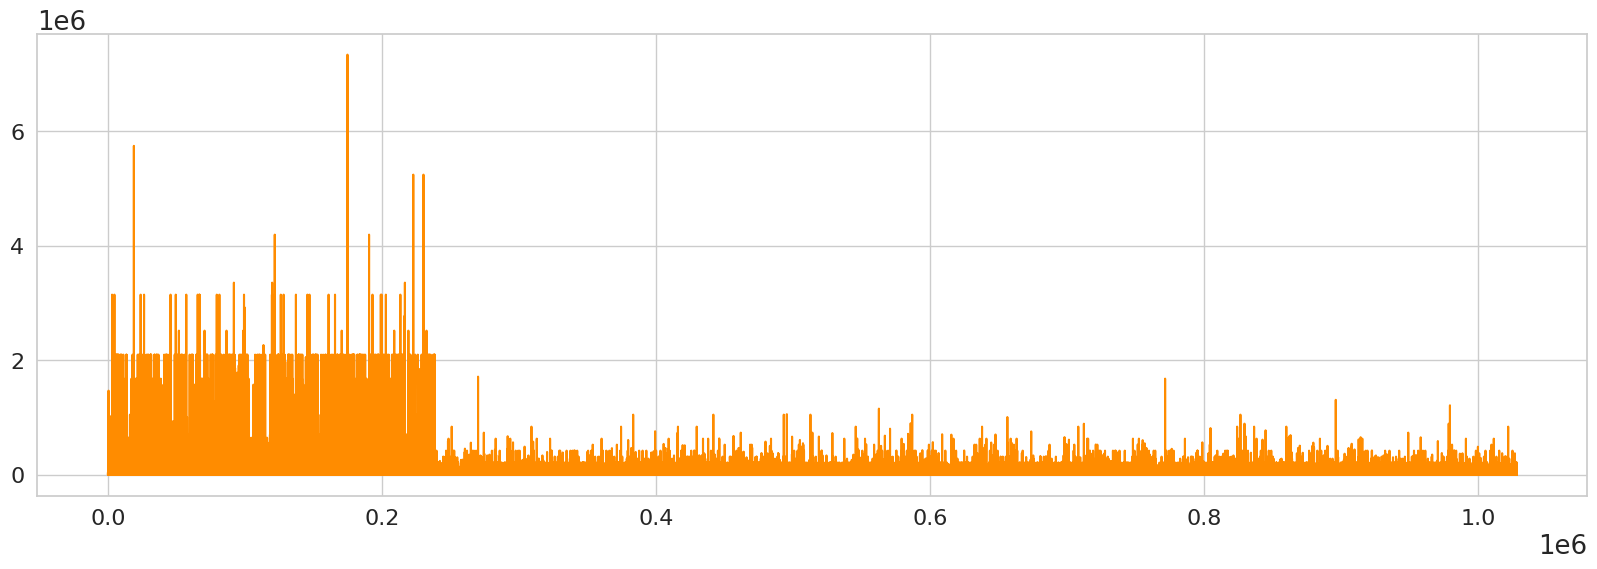

In [25]:
plt.figure(figsize=(20,6))
Srate = df_8['Srate']
time = list(range(len(Srate)))
plt.plot(time, Srate, linestyle='-',color='darkorange')
plt.grid(True)
plt.xticks(time[::200_000], fontsize=16);
plt.yticks(fontsize=16);

Распределение сетевой нагрузки при централизованном и федеративном подходах

centralized

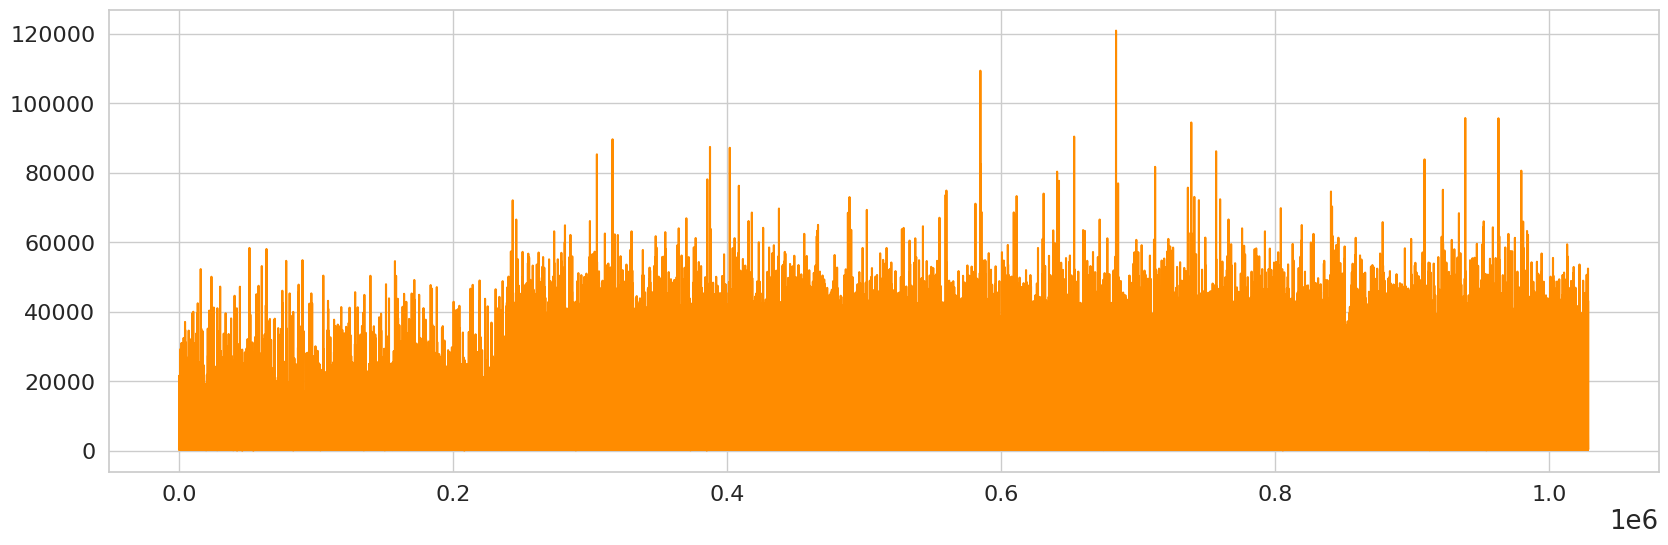

In [26]:
plt.figure(figsize=(20,6))
Tot_sum = df_8['Tot sum']
time = list(range(len(Tot_sum)))
plt.plot(time, Tot_sum, linestyle='-',  color='darkorange')
plt.grid(True)
plt.xticks(time[::200_000], fontsize=16);
plt.yticks(fontsize=16);

federated

In [27]:
import random

Tot_sum = [0] * 250000

# Задаем значения 184 для каждого 1000-го элемента
for i in range(0, 250000, 500):
    Tot_sum[i] = random.randint(180, 250)

# Проверяем результат
# print(Tot_sum)

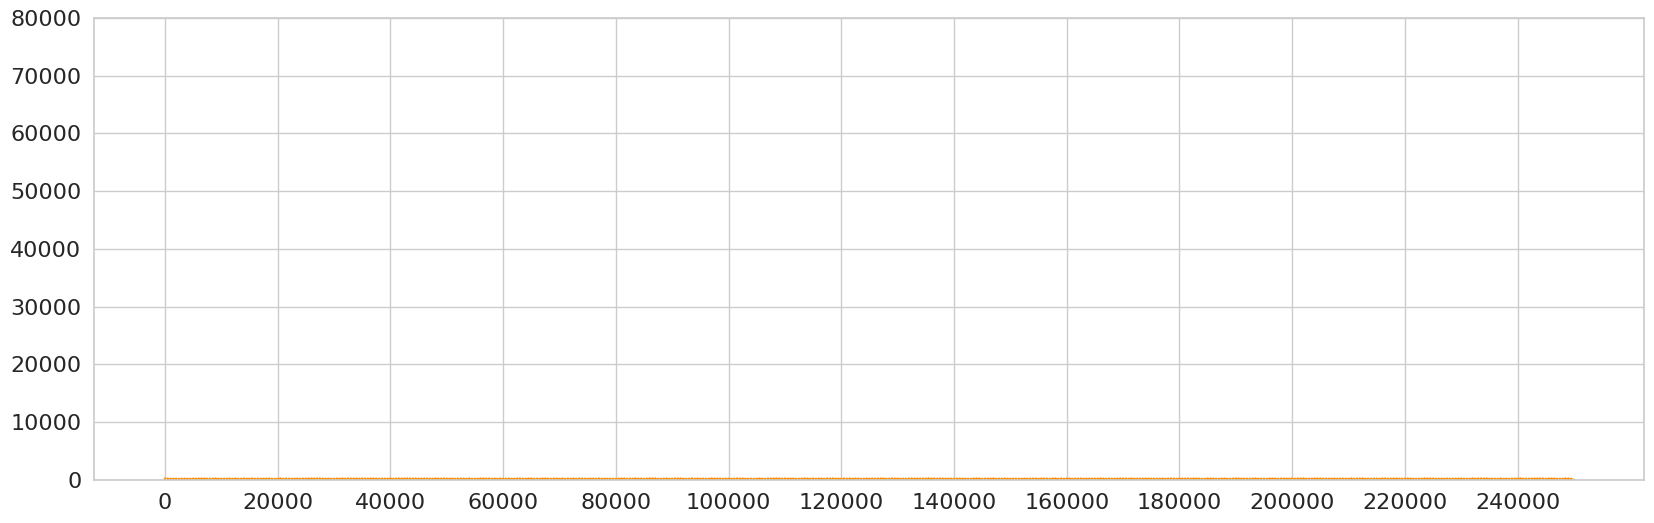

In [29]:
plt.figure(figsize=(20,6))
# Tot_sum = df_8['Tot sum']
time = list(range(len(Tot_sum)))
plt.plot(time, Tot_sum, linestyle='-',  color='darkorange')
plt.grid(True)
plt.xticks(time[::20_000], fontsize=16);
plt.yticks(range(0, 80001, 10000), fontsize=16);
# plt.yticks(range(0, 80_001, 10_000), fontsize=16);


In [30]:
df_8['Tot sum'].describe()

count    1.028551e+06
mean     5.292343e+03
std      7.176707e+03
min      4.200000e+01
25%      5.670000e+02
50%      1.764500e+03
75%      7.462350e+03
max      1.208921e+05
Name: Tot sum, dtype: float64

Protokol Type

In [5]:
# Map IANA Protocol numbers to strings
dic_iana_protocol = { 
    "0": "HOPOPT", "1": "ICMP", "2": "IGMP", "3": "GGP", "4": "IPv4", "5": "ST", 
    "6": "TCP", "7": "CBT", "8": "EGP", "9": "IGP", "10": "BBN-RCC-MON", "11": "NVP-II", 
    "12": "PUP", "13": "ARGUS (deprecated)", "14": "EMCON", "15": "XNET", "16": "CHAOS", 
    "17": "UDP", "18": "MUX", "19": "DCN-MEAS", "20": "HMP", "21": "PRM", "22": "XNS-IDP", 
    "23": "TRUNK-1", "24": "TRUNK-2", "25": "LEAF-1", "26": "LEAF-2", "27": "RDP", 
    "28": "IRTP", "29": "ISO-TP4", "30": "NETBLT", "31": "MFE-NSP", "32": "MERIT-INP", 
    "33": "DCCP", "34": "3PC", "35": "IDPR", "36": "XTP", "37": "DDP", "38": "IDPR-CMTP", 
    "39": "TP++", "40": "IL", "41": "IPv6", "42": "SDRP", "43": "IPv6-Route", 
    "44": "IPv6-Frag", "45": "IDRP", "46": "RSVP", "47": "GRE", "48": "DSR", "49": "BNA", 
    "50": "ESP", "51": "AH", "52": "I-NLSP", "53": "SWIPE (deprecated)", "54": "NARP", 
    "55": "MOBILE", "56": "TLSP", "57": "SKIP", "58": "IPv6-ICMP", "59": "IPv6-NoNxt", 
    "60": "IPv6-Opts", "62": "CFTP", "64": "SAT-EXPAK", "65": "KRYPTOLAN", "66": "RVD", 
    "67": "IPPC", "69": "SAT-MON", "70": "VISA", "71": "IPCV", "72": "CPNX", "73": "CPHB", 
    "74": "WSN", "75": "PVP", "76": "BR-SAT-MON", "77": "SUN-ND", "78": "WB-MON", 
    "79": "WB-EXPAK", "80": "ISO-IP", "81": "VMTP", "82": "SECURE-VMTP", "83": "VINES", 
    "84": "IPTM", "85": "NSFNET-IGP", "86": "DGP", "87": "TCF", "88": "EIGRP", 
    "89": "OSPFIGP", "90": "Sprite-RPC", "91": "LARP", "92": "MTP", "93": "AX.25", 
    "94": "IPIP", "95": "MICP (deprecated)","96": "SCC-SP", "97": "ETHERIP", "98": "ENCAP", 
    "100": "GMTP", "101": "IFMP", "102": "PNNI", "103": "PIM", "104": "ARIS", "105": "SCPS", 
    "106": "QNX", "107": "A/N", "108": "IPComp", "109": "SNP", "110": "Compaq-Peer", 
    "111": "IPX-in-IP", "112": "VRRP", "113": "PGM", "114": "", "115": "L2TP", "116": "DDX",  
    "117": "IATP", "118": "STP", "119": "SRP", "120": "UTI", "121": "SMP", 
    "122": "SM (deprecated)", "123": "PTP","124": "ISIS over IPv4", "125": "FIRE", 
    "126": "CRTP", "127": "CRUDP", "128": "SSCOPMCE", "129": "IPLT", "130": "SPS", 
    "131": "PIPE", "132": "SCTP",  "133": "FC", "134": "RSVP-E2E-IGNORE", 
    "135": "Mobility Header", "136": "UDPLite", "137": "MPLS-in-IP", "138": "manet", 
    "139": "HIP", "140": "Shim6", "141": "WESP", "142": "ROHC", "143": "Ethernet", 
    "144": "AGGFRAG", "145": "NSH"
}
def iana_convert(
    df: pd.DataFrame
    ) -> pd.DataFrame: 
    """
    convert 'Protocol Type' to string
    """
    df["Protocol Type"] = df["Protocol Type"].apply(lambda num : dic_iana_protocol[ str(int(num)) ])
    return df



In [9]:
df = iana_convert(df_8)
df["Protocol Type"].unique()

array(['TCP', 'ICMP', 'UDP', 'GRE', 'CHAOS', 'IGP', 'ST', 'HOPOPT',
       'XNET', 'BBN-RCC-MON', 'EGP', 'IPv4', 'CBT', 'RSVP', 'IDRP',
       'ARGUS (deprecated)', 'PUP', 'IL', 'EMCON', 'NVP-II', 'GGP',
       'IGMP', 'IPv6-Route', 'TP++', 'IPv6-Frag', 'DDP', 'SDRP',
       'IDPR-CMTP', 'IPv6', '3PC', 'MFE-NSP', 'XTP', 'IDPR', 'MERIT-INP',
       'LEAF-1', 'HMP', 'ISO-TP4', 'DCCP', 'PRM', 'IRTP', 'RDP',
       'TRUNK-2', 'NETBLT', 'TRUNK-1', 'XNS-IDP', 'DCN-MEAS'],
      dtype=object)

In [10]:
gr_data = df.groupby('Protocol Type')['Protocol Type'].count()

In [12]:
gr_data = gr_data.sort_values(ascending=False)
gr_data

Protocol Type
TCP                   468449
CBT                   145144
EGP                    82289
ST                     54698
IGP                    53838
UDP                    36492
ICMP                   36106
BBN-RCC-MON            34505
NVP-II                 23828
PUP                    20705
ARGUS (deprecated)     15335
CHAOS                  15059
IPv4                   13704
EMCON                  10033
XNET                    5632
GRE                     3726
RSVP                    3160
HOPOPT                  2632
GGP                     1128
IDRP                    1013
IPv6-Frag                308
IGMP                     279
IPv6-Route               149
SDRP                      93
IPv6                      57
IL                        45
TP++                      36
IDPR-CMTP                 22
XTP                       17
DDP                       15
3PC                        9
DCCP                       9
ISO-TP4                    6
IDPR                       5


In [13]:
gr_data1 = gr_data[:10]

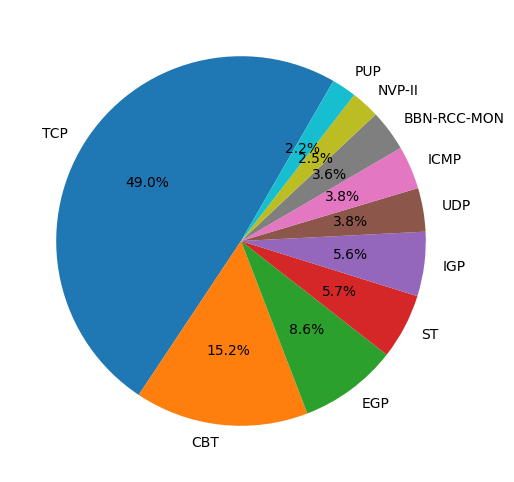

In [14]:
from matplotlib import pyplot as plt

plt.figure(figsize=(6,6))
plt.pie(gr_data1, labels=gr_data1.index , autopct='%1.1f%%', startangle=60);